# OpenCV Min, Max, Min-Max-Loc

Documentation:

https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?#min

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Min, Max - 1

In [2]:
np.random.seed = 11
b = np.random.randint(0,256,(3,3))
b

array([[107, 138,  53],
       [195,  38,  71],
       [190,  31, 252]])

In [3]:
cv2.min(b,100)

array([[100, 100,  53],
       [100,  38,  71],
       [100,  31, 100]], dtype=int32)

In [4]:
cv2.max(b,100)

array([[107, 138, 100],
       [195, 100, 100],
       [190, 100, 252]], dtype=int32)

In [5]:
np.min(b)

31

In [6]:
np.max(b)

252

## Min, Max - 2

In [7]:
np.random.seed = 22
a1 = np.random.randint(0,2,(3,3))
a1

array([[0, 0, 0],
       [1, 1, 1],
       [1, 0, 0]])

In [8]:
a2 = np.copy(a1)

In [9]:
a2 = a2 + 1
a2[a2 > 1]=0
a2

array([[1, 1, 1],
       [0, 0, 0],
       [0, 1, 1]])

In [10]:
a1 + a2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [11]:
cv2.min(a1,a2)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [12]:
cv2.max(a1,a2)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [13]:
np.minimum(a1,a2)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
np.maximum(a1,a2)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

## Min Max Loc

In [15]:
np.random.seed = 33
c = np.random.randint(0,256,(2,5))
c

array([[ 94, 166, 157, 156, 139],
       [ 43,  15, 238,  71,  78]])

In [16]:
cv2.minMaxLoc(c)

(15.0, 238.0, (1, 1), (2, 1))

In [17]:
np.argmin(c)

6

In [18]:
np.argmax(c) #note: array flattened, position provided

7

In [19]:
np.ravel(c)

array([ 94, 166, 157, 156, 139,  43,  15, 238,  71,  78])

In [20]:
np.max(c)

238

In [21]:
np.where(c == np.max(c))

(array([1], dtype=int64), array([2], dtype=int64))

## Image

SOURCE: https://unsplash.com/photos/MZVTalo8VcM

In [22]:
img = cv2.imread('wolf2.jpg')

In [23]:
img.shape

(427, 640, 3)

In [24]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

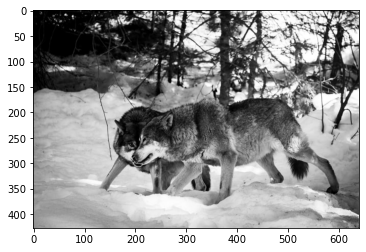

In [25]:
plt.imshow(img)

In [26]:
img_gray = cv2.imread('wolf2.jpg',0)

In [27]:
img_gray.shape

(427, 640)

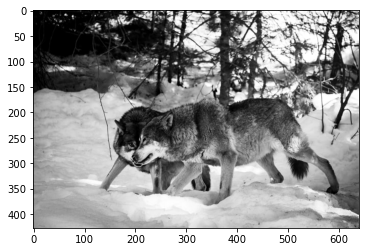

In [28]:
plt.imshow(img_gray,cmap='gray')

In [29]:
img_gray

array([[  0,   0,   0, ..., 237, 246, 248],
       [  0,   0,   0, ..., 255, 255, 233],
       [  0,   0,   0, ..., 201, 227, 241],
       ...,
       [144, 143, 145, ..., 111, 105,  92],
       [139, 138, 141, ..., 112,  95,  63],
       [133, 133, 136, ..., 111,  83,  28]], dtype=uint8)

In [30]:
cv2.minMaxLoc(img_gray)

(0.0, 255.0, (0, 0), (338, 0))

In [31]:
import seaborn as sns

C:\Users\sunde\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


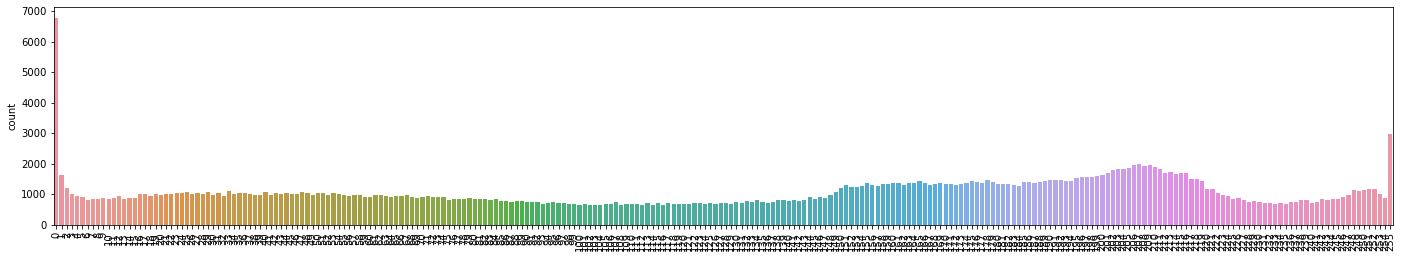

In [32]:
dims = (24, 4)
fig, ax = plt.subplots(figsize=dims)
chart = sns.countplot(np.ravel(img_gray))
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [33]:
uniqueValues, occurCount = np.unique(np.ravel(img_gray), return_counts=True)

In [34]:
uniqueValues[-1]

255

In [35]:
occurCount[-1]

2986

In [36]:
uniqueValues[0]

0

In [37]:
occurCount[0]

6788

# Image 2
Source: https://unsplash.com/photos/Xuf8FJwLZfE

In [39]:
img2 = cv2.imread('bubble_colors.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

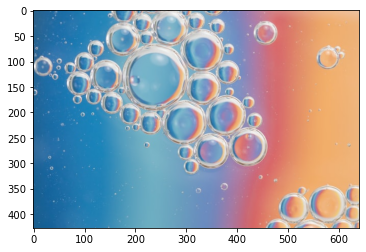

In [40]:
plt.imshow(img2)

In [41]:
img2_blue = img2[:,:,2]

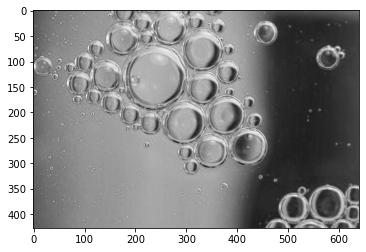

In [44]:
plt.imshow(img2_blue,cmap='gray')

In [45]:
img2_red = img2[:,:,0]

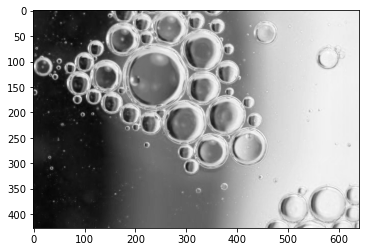

In [46]:
plt.imshow(img2_red,cmap='gray')